# 宽基指数和行业分布

## 导入模块

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker
import feather
import os
from tqdm.notebook import tqdm
import sunlandsdatasdk as sd

## 读入股价跳跃数据和指数成分股

股价跳跃数据

In [2]:
jump = feather.read_dataframe('../data/jump/jump.feather')
jump['date'] = pd.to_datetime(jump['date'])
date_series = jump['date'].sort_values().unique()
mon_series = jump['year_mon'].sort_values().unique()

行业指数成分股

In [3]:
# hs800 = feather.read_dataframe('../data/indices/hs800.feather')
# hs1000 = feather.read_dataframe('../data/indices/hs1000.feather')
# date_max = hs800['date'].max()
# sd.auth('*', '*')
# for date in tqdm(date_series[date_series > date_max]):
#     hs800_daily = pd.DataFrame(columns=['issue', 'date'])
#     hs800_daily['issue'] = sd.get_index_stocks('000906', weight=False, date=date)
#     hs800_daily['date'] = date
#     hs800 = pd.concat([hs800, hs800_daily])
    
#     hs1000_daily = pd.DataFrame(columns=['issue', 'date'])
#     hs1000_daily['issue'] = sd.get_index_stocks('000852', weight=False, date=date)
#     hs1000_daily['date'] = date
#     hs1000 = pd.concat([hs1000, hs1000_daily])
# os.makedirs('../data/indices/', exist_ok=True)
# feather.write_dataframe(hs800, '../data/indices/hs800_20241231.feather')
# feather.write_dataframe(hs1000, '../data/indices/hs1000_20241231.feather')

In [4]:
# hs800_mon = feather.read_dataframe('../data/indices/hs800_mon.feather')
# hs1000_mon = feather.read_dataframe('../data/indices/hs1000_mon.feather')
# mon_max = hs800_mon['year_mon'].max()
# sd.auth('*', '*')
# for year_mon in tqdm(mon_series[mon_series > mon_max]):
#     date = year_mon * 100 + 1
#     date = pd.to_datetime(date, format='ISO8601')
#     hs800_daily = pd.DataFrame(columns=['issue', 'year_mon', 'date'])
#     hs800_daily['issue'] = sd.get_index_stocks('000906', weight=False, date=date)
#     hs800_daily['year_mon'] = year_mon
#     hs800_daily['date'] = date
#     hs800_mon = pd.concat([hs800_mon, hs800_daily])
    
#     hs1000_daily = pd.DataFrame(columns=['issue', 'year_mon', 'date'])
#     hs1000_daily['issue'] = sd.get_index_stocks('000852', weight=False, date=date)
#     hs1000_daily['year_mon'] = year_mon
#     hs1000_daily['date'] = date
#     hs1000_mon = pd.concat([hs1000_mon, hs1000_daily])
# feather.write_dataframe(hs800_mon, '../data/indices/hs800_mon_20241231.feather')
# feather.write_dataframe(hs1000_mon, '../data/indices/hs1000_mon_20241231.feather')

In [5]:
hs800 = feather.read_dataframe('../data/indices/hs800_20241231.feather')
hs1000 = feather.read_dataframe('../data/indices/hs1000_20241231.feather')
hs800_mon = feather.read_dataframe('../data/indices/hs800_mon_20241231.feather')
hs1000_mon = feather.read_dataframe('../data/indices/hs1000_mon_20241231.feather')

申万行业

In [6]:
industry = feather.read_dataframe('../data/industry_classes.feather')
industry['date'] = pd.to_datetime(industry['date'])
industry = industry[['issue', 'date', 'L1']]

## 宽基指数

In [7]:
jump_hs800 = pd.merge(
    jump,
    hs800,
    on=['issue', 'date'],
    how='inner'
)

jump_hs1000 = pd.merge(
    jump,
    hs1000,
    on=['issue', 'date'],
    how='inner'
)

### 跳跃数量统计

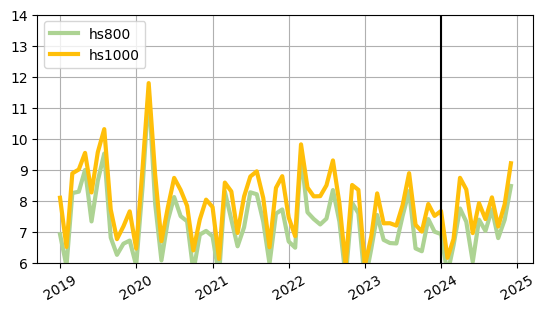

In [8]:
jump_count_800 = jump_hs800.groupby('year_mon')['jump'].count() / 800
jump_count_800 = jump_count_800.reset_index()
jump_count_800['date'] = jump_count_800['year_mon'] * 100 + 1
jump_count_800['date'] = pd.to_datetime(jump_count_800['date'], format='ISO8601')

jump_count_1000 = jump_hs1000.groupby('year_mon')['jump'].count() / 1000
jump_count_1000 = jump_count_1000.reset_index()
jump_count_1000['date'] = jump_count_1000['year_mon'] * 100 + 1
jump_count_1000['date'] = pd.to_datetime(jump_count_1000['date'], format='ISO8601')

plt.plot(jump_count_800['date'], jump_count_800['jump'], linewidth=3, color='#add393', label='hs800')
plt.plot(jump_count_1000['date'], jump_count_1000['jump'], linewidth=3, color='#ffbf09', label='hs1000')
plt.axvline(x=pd.to_datetime('2024-01-01'), color='black')
plt.gca().set_box_aspect(0.5)
plt.ylim(6, 14)
plt.yticks(range(6, 15))
plt.xticks(rotation=30)
plt.legend()
plt.grid()
plt.show()

In [9]:
jump_count = (
    jump
        .groupby(['issue', 'year_mon'])['jump']
        .count()
        .reset_index()
)

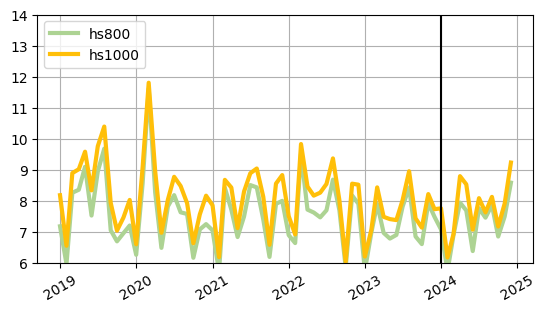

In [10]:
jump_count_800 = pd.merge(
    jump_count,
    hs800_mon,
    on=['issue', 'year_mon'],
    how='inner'
)
jump_count_800 = (
    jump_count_800
        .groupby('year_mon')['jump']
        .mean()
        .reset_index()
)
jump_count_800['date'] = jump_count_800['year_mon'] * 100 + 1
jump_count_800['date'] = pd.to_datetime(jump_count_800['date'], format='ISO8601')

jump_count_1000 = pd.merge(
    jump_count,
    hs1000_mon,
    on=['issue', 'year_mon'],
    how='inner'
)
jump_count_1000 = (
    jump_count_1000
        .groupby('year_mon')['jump']
        .mean()
        .reset_index()
)
jump_count_1000['date'] = jump_count_1000['year_mon'] * 100 + 1
jump_count_1000['date'] = pd.to_datetime(jump_count_1000['date'], format='ISO8601')

plt.plot(jump_count_800['date'], jump_count_800['jump'], linewidth=3, color='#add393', label='hs800')
plt.plot(jump_count_1000['date'], jump_count_1000['jump'], linewidth=3, color='#ffbf09', label='hs1000')
plt.gca().set_box_aspect(0.5)
plt.axvline(x=pd.to_datetime('2024-01-01'), color='black')
plt.ylim(6, 14)
plt.yticks(range(6, 15))
plt.xticks(rotation=30)
plt.legend()
plt.grid()
plt.savefig('../results/识别股价跳跃-图2.png')
plt.show()

### 跳跃幅度统计

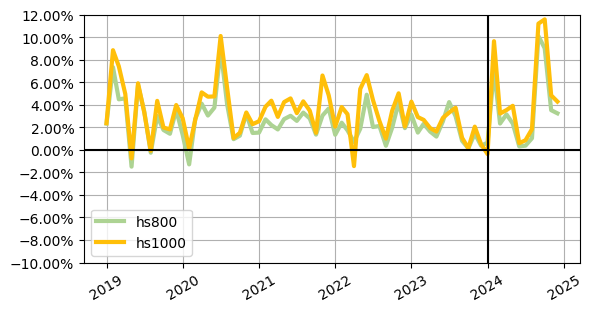

In [11]:
ret_jump_month_800 = jump_hs800.groupby(['issue', 'year_mon'])['ret_jump'].sum().reset_index()
ret_800 = ret_jump_month_800.groupby('year_mon')['ret_jump'].median()
ret_800 = ret_800.reset_index()
ret_800['date'] = ret_800['year_mon'] * 100 + 1
ret_800['date'] = pd.to_datetime(ret_800['date'], format='ISO8601')

ret_jump_month_1000 = jump_hs1000.groupby(['issue', 'year_mon'])['ret_jump'].sum().reset_index()
ret_1000 = ret_jump_month_1000.groupby('year_mon')['ret_jump'].median()
ret_1000 = ret_1000.reset_index()
ret_1000['date'] = ret_1000['year_mon'] * 100 + 1
ret_1000['date'] = pd.to_datetime(ret_1000['date'], format='ISO8601')

plt.plot(ret_800['date'], ret_800['ret_jump'], linewidth=3, color='#add393', label='hs800')
plt.plot(ret_1000['date'], ret_1000['ret_jump'], linewidth=3, color='#ffbf09', label='hs1000')
plt.ylim(-0.1, 0.12)
plt.yticks(np.arange(-0.1, 0.13, 0.02))
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=2))
plt.axhline(y=0, color='black')
plt.axvline(x=pd.to_datetime('2024-01-01'), color='black')
plt.gca().set_box_aspect(0.5)
plt.xticks(rotation=30)
plt.legend()
plt.grid()
plt.show()

In [12]:
ret_jump = (
    jump
        .groupby(['issue', 'year_mon'])['ret_jump']
        .sum()
        .reset_index()
)

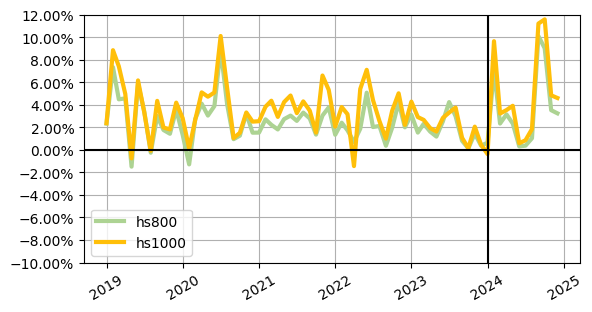

In [13]:
ret_800 = pd.merge(
    ret_jump,
    hs800_mon,
    on=['issue', 'year_mon'],
    how='inner'
)
ret_800 = (
    ret_800
        .groupby('year_mon')['ret_jump']
        .median()
        .reset_index()
)
ret_800['date'] = ret_800['year_mon'] * 100 + 1
ret_800['date'] = pd.to_datetime(ret_800['date'], format='ISO8601')

ret_1000 = pd.merge(
    ret_jump,
    hs1000_mon,
    on=['issue', 'year_mon'],
    how='inner'
)
ret_1000 = (
    ret_1000
        .groupby('year_mon')['ret_jump']
        .median()
        .reset_index()
)
ret_1000['date'] = ret_1000['year_mon'] * 100 + 1
ret_1000['date'] = pd.to_datetime(ret_1000['date'], format='ISO8601')

plt.plot(ret_800['date'], ret_800['ret_jump'], linewidth=3, color='#add393', label='hs800')
plt.plot(ret_1000['date'], ret_1000['ret_jump'], linewidth=3, color='#ffbf09', label='hs1000')
plt.ylim(-0.1, 0.12)
plt.yticks(np.arange(-0.1, 0.13, 0.02))
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=2))
plt.axhline(y=0, color='black')
plt.axvline(x=pd.to_datetime('2024-01-01'), color='black')
plt.gca().set_box_aspect(0.5)
plt.xticks(rotation=30)
plt.legend()
plt.grid()
plt.savefig('../results/识别股价跳跃-图3.png')
plt.show()

## 行业分布

### 行业跳跃数量统计

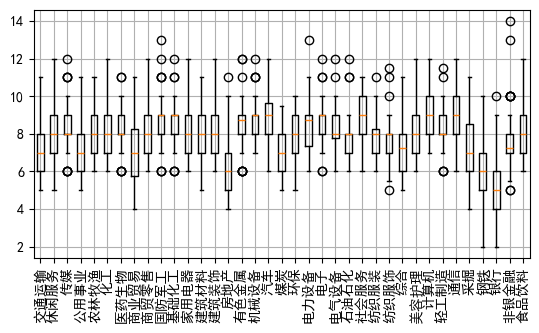

In [14]:
jump_count['date'] = jump_count['year_mon'] * 100 + 1
jump_count['date'] = pd.to_datetime(jump_count['date'], format='ISO8601')
jump_indus = pd.merge_asof(
    jump_count.sort_values(['date', 'issue']),
    industry.sort_values(['date', 'issue']),
    on='date',
    by='issue',
    direction='backward'
)
jump_indus = (
    jump_indus
        .groupby(['L1', 'year_mon'])['jump']
        .median()
        .reset_index()
)

grouped = jump_indus.groupby('L1')['jump']
L1 = jump_indus['L1'].unique()
jump_L1 = [grouped.get_group(name).to_numpy() for name in L1]

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.boxplot(jump_L1, tick_labels=L1)
plt.xticks(rotation=90)
plt.grid()
plt.gca().set_box_aspect(0.5)
plt.savefig('../results/识别股价跳跃-图4.png')
plt.show()

### 行业跳跃幅度统计

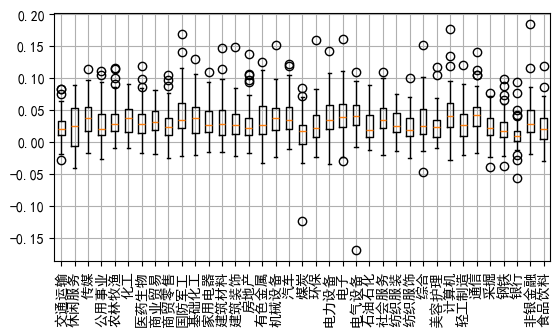

In [15]:
ret_jump['date'] = ret_jump['year_mon'] * 100 + 1
ret_jump['date'] = pd.to_datetime(ret_jump['date'], format='ISO8601')
ret_indus = pd.merge_asof(
    ret_jump.sort_values(['date', 'issue']),
    industry.sort_values(['date', 'issue']),
    on='date',
    by='issue',
    direction='backward'
)
ret_indus = (
    ret_indus
        .groupby(['L1', 'year_mon'])['ret_jump']
        .median()
        .reset_index()
)

grouped = ret_indus.groupby('L1')['ret_jump']
L1 = ret_indus['L1'].unique()
ret_L1 = [grouped.get_group(name).to_numpy() for name in L1]

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.boxplot(ret_L1, tick_labels=L1)
plt.xticks(rotation=90)
plt.grid()
plt.gca().set_box_aspect(0.5)
plt.savefig('../results/识别股价跳跃-图5.png')
plt.show()